In [1]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# All timing are in micro seconds (us)

In [2]:
core_selected = [1, 2, 4, 8, 16, 32, 64, 72]#, 81, 96]
mat_size = [256, 512, 1024, 2048, 4096, 8192]

In [3]:
df = pd.read_csv("./results/grid_run_only.csv")
pd.options.display.max_rows = 999
df = df[df["m"].isin(mat_size)]
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df.sort_values(["cores", "m"], inplace=True)
df.reset_index(inplace=True, drop = True)
df


,conf,m,cores,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp
0,f16_m4,256,1,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,2.860748e+02,NaN,0.760000,33.000000,24.000000,1000.0,39.924375
1,f16_m4,512,1,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,6.299894e+02,NaN,0.760000,33.000000,24.000000,1000.0,40.758333
2,f16_m4,1024,1,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,3.098927e+03,NaN,0.759990,33.220000,24.000000,1000.0,41.732431
3,f16_m4,2048,1,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,2.238453e+04,NaN,0.759988,36.296667,26.873333,1000.0,43.876233
4,f16_m4,4096,1,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,1.718953e+05,NaN,0.759988,39.000000,28.616667,1000.0,49.848125
5,f16_m4,8192,1,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,40.58%,0.46%,2.645678e+06,0.415588,0.760000,35.000000,25.000000,1000.0,50.093750
6,f16_m4,256,2,"(2, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,3.014688e+02,NaN,0.760000,35.000000,26.000000,1000.0,50.353958
7,f16_m4,512,2,"(2, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,4.463052e+02,NaN,0.759993,35.000000,26.000000,1000.0,50.358472
8,f16_m4,1024,2,"(2, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,1.717029e+03,NaN,0.759980,35.000000,26.000000,1000.0,50.607240
9,f16_m4,2048,2,"(2, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,NaN,NaN,1.135111e+04,NaN,0.759973,36.786667,27.070000,1000.0,50.833264


In [4]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [5]:
import re
pattern = r"\((\d+), (\d+)\)"

df_inf = pd.DataFrame()
for g in df['grid_size'].unique():
    match = re.match(pattern, str(g))
    num1, num2 = match.groups()
    cores = int(num1) * int(num2)
    if cores in core_selected:
        val = df.loc[(df['grid_size'] == g)]['run'].values
        df_inf[cores] = val

df_inf.index = unq_m    
df_inf  = df_inf.reindex(sorted(df_inf.columns), axis=1)
df_inf

,1,2,4,8,16,32,64,72
256,2.860748e+02,3.014688e+02,283.932599,281.952670,292.850447,298.036456,284.236609,288.524478
512,6.299894e+02,4.463052e+02,511.847001,326.605480,316.546130,298.787020,290.967159,293.878831
1024,3.098927e+03,1.717029e+03,1048.896750,689.622386,541.922266,468.888544,438.095933,431.082199
2048,2.238453e+04,1.135111e+04,6010.294450,3318.289756,2054.022212,1310.563208,989.159110,906.873887
4096,1.718953e+05,8.668896e+04,44331.678665,22985.713459,12596.994274,7123.283521,4401.821959,3696.507705
8192,2.645678e+06,1.325116e+06,662833.181222,334234.022299,169719.679356,88615.276814,46745.804151,36995.337009


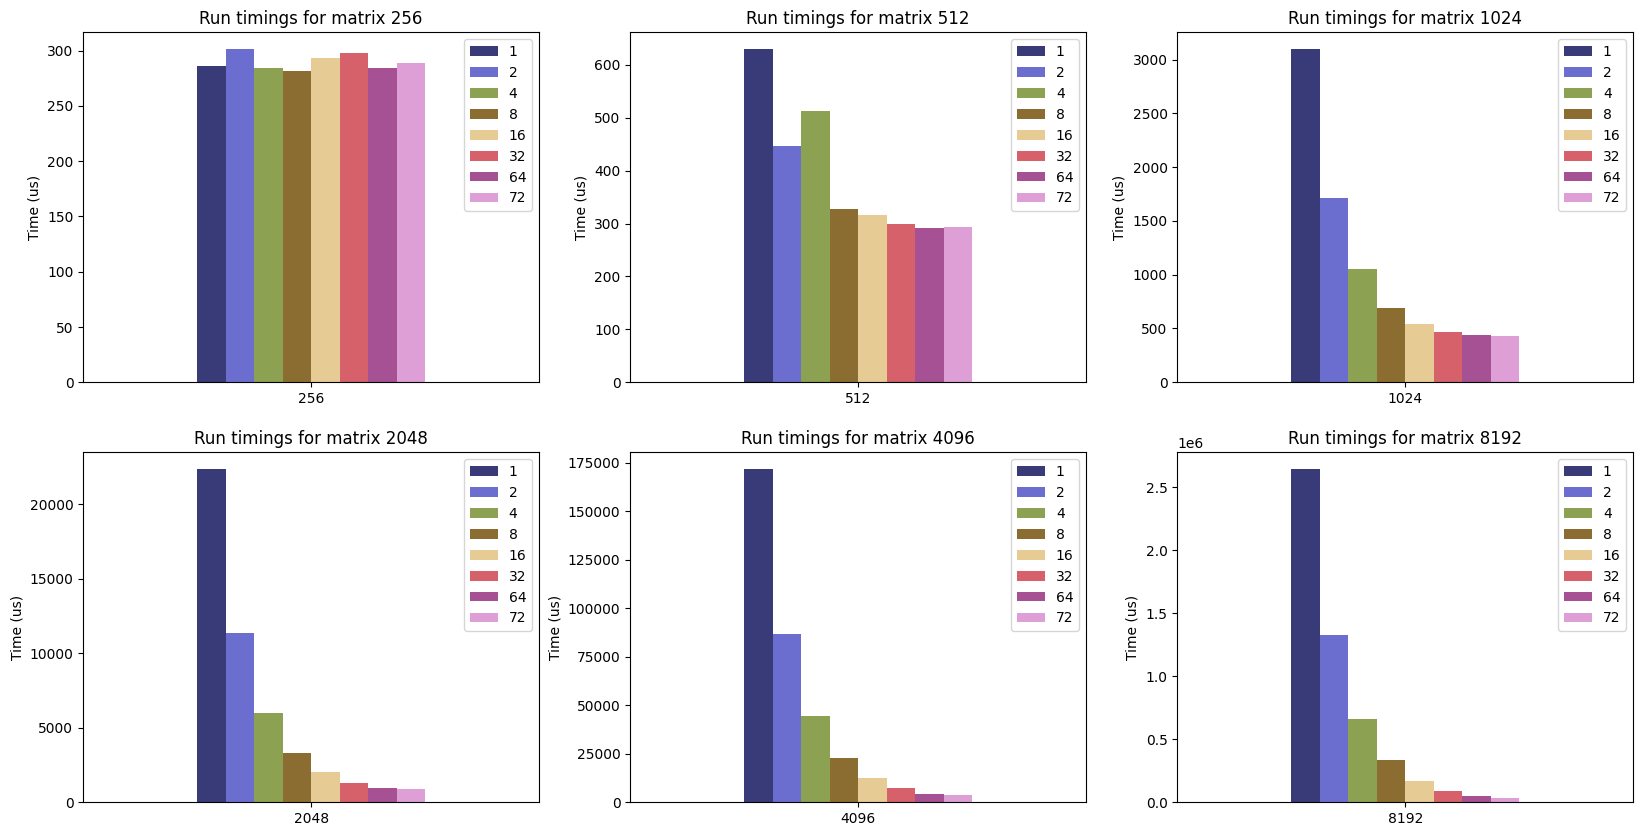

In [6]:
n_rows = int(np.ceil(len(unq_m) / 3))
fig, axs = plt.subplots(n_rows, 3, figsize=(20,10))
i, j = 0, 0
for m in unq_m:
    plot = df_inf.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"Run timings for matrix {m}")
    plot.set_ylabel("Time (us)")
    if j < 2:
        j += 1
    else:
        j = 0
        i += 1

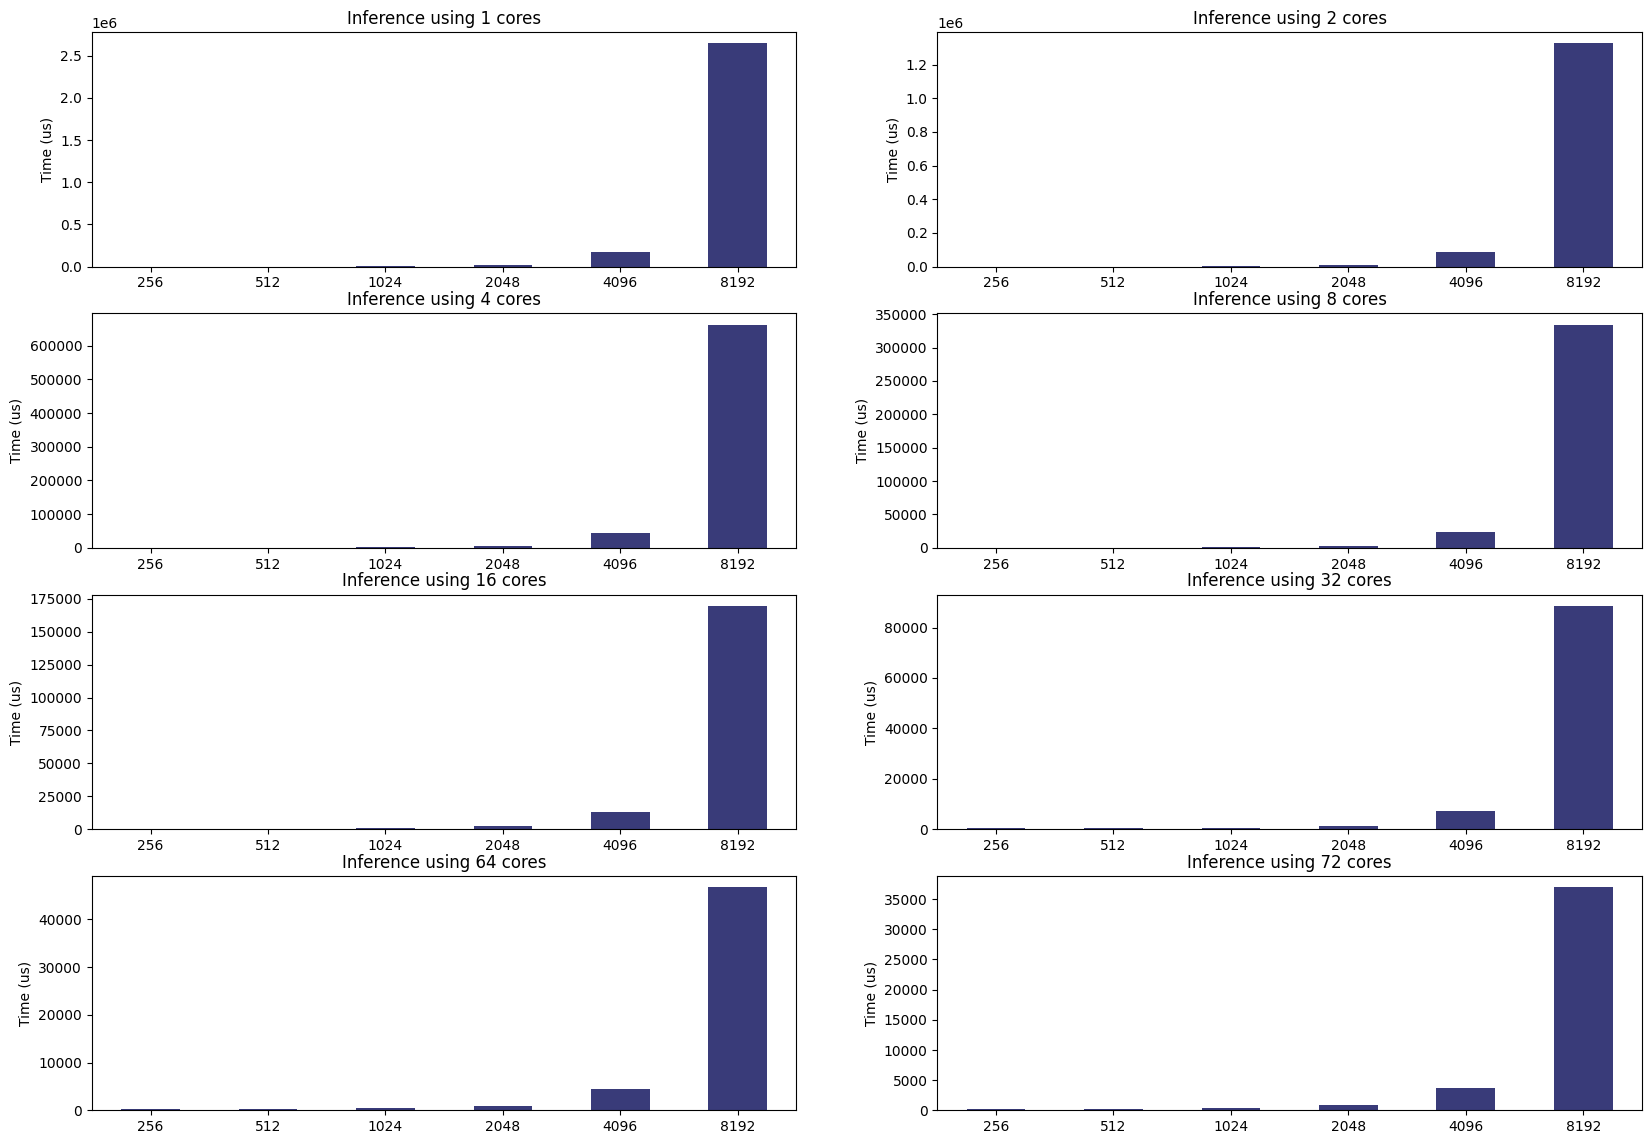

In [7]:
n_rows = int(np.ceil(len(df_inf.columns) / 2))
if n_rows == 1:
    n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,14))
i, j = 0, 0
for g in df_inf.columns:
    plot = df_inf[g].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_ylabel("Time (us)")
    plot.set_title("Inference using " + str(g) + " cores")
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

## Speedup

In [8]:
df_inf

,1,2,4,8,16,32,64,72
256,2.860748e+02,3.014688e+02,283.932599,281.952670,292.850447,298.036456,284.236609,288.524478
512,6.299894e+02,4.463052e+02,511.847001,326.605480,316.546130,298.787020,290.967159,293.878831
1024,3.098927e+03,1.717029e+03,1048.896750,689.622386,541.922266,468.888544,438.095933,431.082199
2048,2.238453e+04,1.135111e+04,6010.294450,3318.289756,2054.022212,1310.563208,989.159110,906.873887
4096,1.718953e+05,8.668896e+04,44331.678665,22985.713459,12596.994274,7123.283521,4401.821959,3696.507705
8192,2.645678e+06,1.325116e+06,662833.181222,334234.022299,169719.679356,88615.276814,46745.804151,36995.337009


In [15]:
df_inf.T.loc[[1]].values / df_inf.T.loc[[64]].values

array([[ 2.16515655,  7.0736256 , 22.62985521, 39.05094876, 56.59711279]])

In [9]:
# df_inf[88] = df_inf[72]
df_inf.drop(72, axis=1, inplace=True)
df_inf.drop(256, axis=0, inplace=True)

<Figure size 640x480 with 0 Axes>

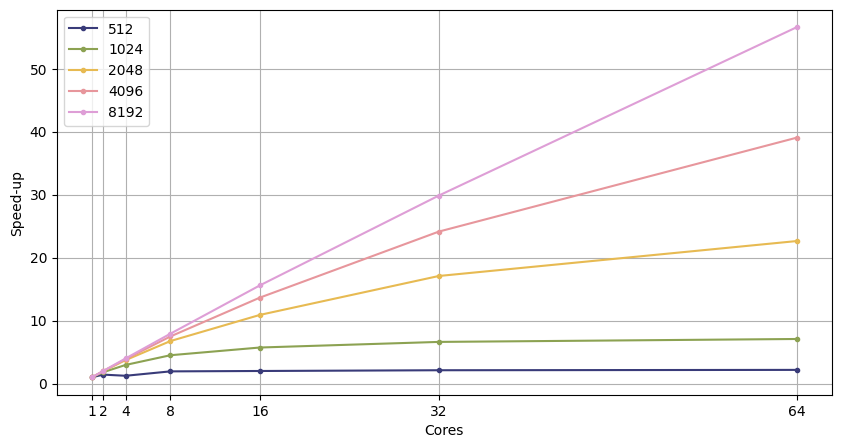

In [ ]:
plt.figure(dpi=100)

df_su = pd.DataFrame()
for g in df_inf.T.index:
    df_su[g] = (df_inf.T.loc[[1]].values / df_inf.T.loc[[g]].values)[0]

df_su.index = df_inf.index
df_su.T.plot(kind='line', figsize=(10, 5), colormap="tab20b", marker='.')
plt.xlabel('Cores')
plt.ylabel('Speed-up')
plt.xticks(ticks=df_su.T.index, labels=df_su.T.index)
plt.grid(True)
plt.show()

In [12]:
df_su

,1,2,4,8,16,32,64
512,1.0,1.411567,1.230816,1.928900,1.990198,2.108490,2.165157
1024,1.0,1.804819,2.954463,4.493657,5.718397,6.609090,7.073626
2048,1.0,1.972012,3.724365,6.745803,10.897899,17.080082,22.629855
4096,1.0,1.982898,3.877483,7.478355,13.645741,24.131473,39.050949
8192,1.0,1.996563,3.991468,7.915644,15.588514,29.855773,56.597113


## GFLOPS

In [52]:
df_inf

,1,2,4,8,16,32,64,72
256,2.860748e+02,3.014688e+02,283.932599,281.952670,292.850447,298.036456,284.236609,288.524478
512,6.299894e+02,4.463052e+02,511.847001,326.605480,316.546130,298.787020,290.967159,293.878831
1024,3.098927e+03,1.717029e+03,1048.896750,689.622386,541.922266,468.888544,438.095933,431.082199
2048,2.238453e+04,1.135111e+04,6010.294450,3318.289756,2054.022212,1310.563208,989.159110,906.873887
4096,1.718953e+05,8.668896e+04,44331.678665,22985.713459,12596.994274,7123.283521,4401.821959,3696.507705
8192,2.645678e+06,1.325116e+06,662833.181222,334234.022299,169719.679356,88615.276814,46745.804151,36995.337009


In [53]:
n_flop = 2 * np.power(df_inf.index, 3)
df_inf_flops = pd.DataFrame()
for conf in df_inf.columns:
    df_inf_flops[conf] = n_flop/ 1e9 / (df_inf[conf] / 1e6)
df_inf_flops

,1,2,4,8,16,32,64,72
256,117.292509,111.303177,118.177455,119.007321,114.578729,112.584992,118.051056,116.296656
512,426.095161,601.461672,524.444718,821.895138,848.013704,898.417395,922.562727,913.422225
1024,692.976608,1250.697422,2047.373727,3113.999329,3962.715290,4579.944797,4901.857077,4981.610591
2048,767.488580,1513.497024,2858.407242,5177.326408,8364.013342,13108.768110,17368.155440,18944.055432
4096,799.550275,1585.426249,3100.242481,5979.320752,10910.456136,19294.325864,31223.196838,37180.756663
8192,415.587919,829.747594,1658.805954,3289.646040,6478.397979,12407.698394,23521.076335,29720.276031


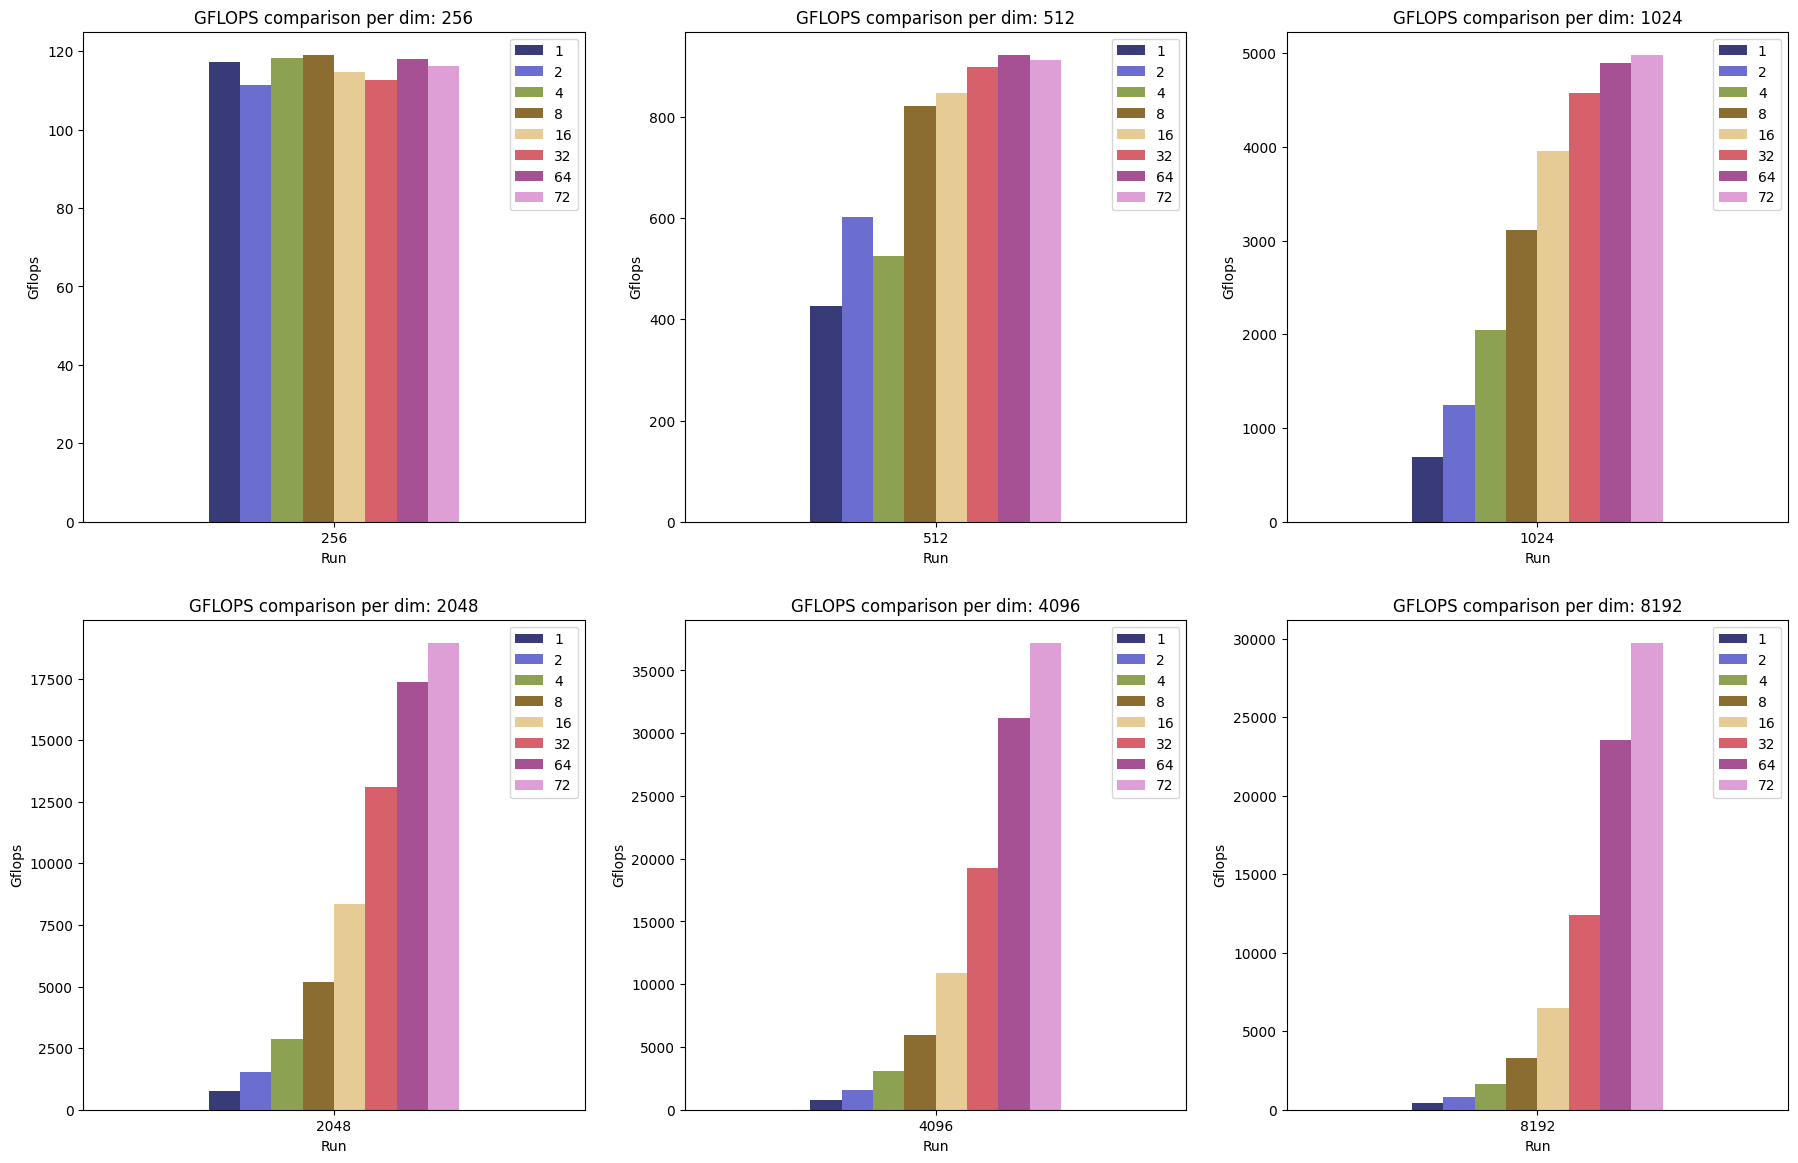

In [54]:
n_rows = int(np.ceil(len(unq_m) / 3))

if n_rows == 1:
    n_rows = 2

n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(22,14))
i, j = 0, 0
for m in unq_m:
    # Create a stacked bar plot
    plot = df_inf_flops.loc[[m]] .plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)

    #  Plot the diagonal line
    # ax = axs[i][j]
    # lims = [df_combined.index[0], df_combined.index[-2]], [df_combined[m].values[0], df_combined[m].values[-2]]
    # ax.plot(lims[0], lims[1], 'k--', alpha=0.75, zorder=0, label="Linear scaling")
    
    # plot.set_xticks(df_combined.index)
    # plot.set_xticklabels(["Grayskull bf16", "Coffee Lake fp32", "Sapphire Rapids vf16", "Sapphire Rapids fp32"], rotation=20)
    
    if j < n_cols - 1:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'GFLOPS comparison per dim: {m}')
    plot.set_xlabel('Run')
    plot.set_ylabel('Gflops')
plt.show()

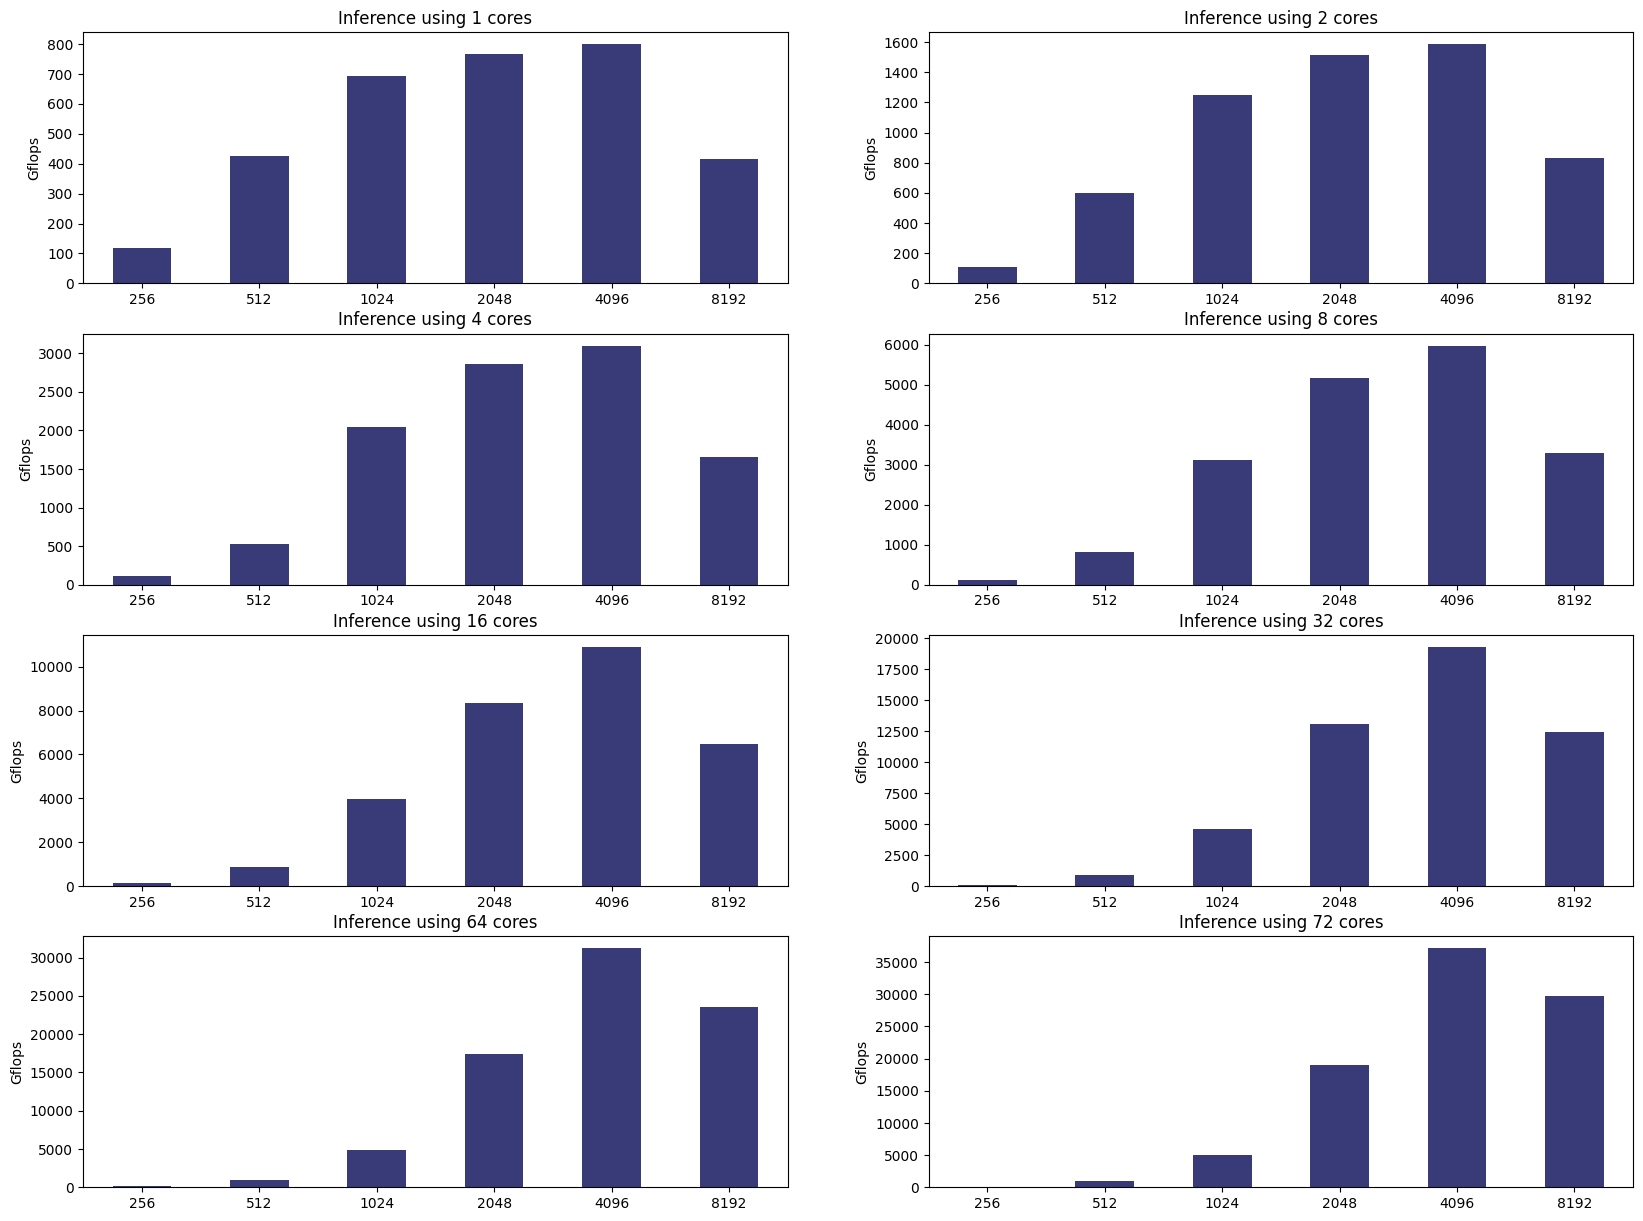

In [55]:
n_rows = int(np.ceil(len(df_inf_flops.columns) / 2))
if n_rows == 1:
    n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))
i, j = 0, 0
for g in df_inf_flops.columns:
    plot = df_inf_flops[g].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_ylabel("Gflops")
    plot.set_title("Inference using " + str(g) + " cores")
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

## Power

In [56]:
pattern = r"\((\d+), (\d+)\)"
key = "power"
df_power = pd.DataFrame()
for g in df['grid_size'].unique():
    match = re.match(pattern, str(g))
    num1, num2 = match.groups()
    cores = int(num1) * int(num2)
    if cores in core_selected:
        val = df.loc[(df['grid_size'] == g)][key].values
        df_power[cores] = val

df_power.index = unq_m    
df_power  = df_power.reindex(sorted(df_power.columns), axis=1)
df_power

,1,2,4,8,16,32,64,72
256,24.000000,26.00,26.000000,24.000000,26.00,26.000000,26.000000,26.000000
512,24.000000,26.00,26.000000,24.083333,26.00,26.410000,26.646667,26.000000
1024,24.000000,26.00,26.846667,26.763333,28.84,31.346667,28.766667,28.453333
2048,26.873333,27.07,27.000000,27.993333,32.95,33.956667,33.563333,33.470000
4096,28.616667,29.00,29.000000,28.990000,33.00,34.000000,34.000000,33.976667
8192,25.000000,26.50,27.500000,29.000000,31.50,37.000000,43.500000,39.000000


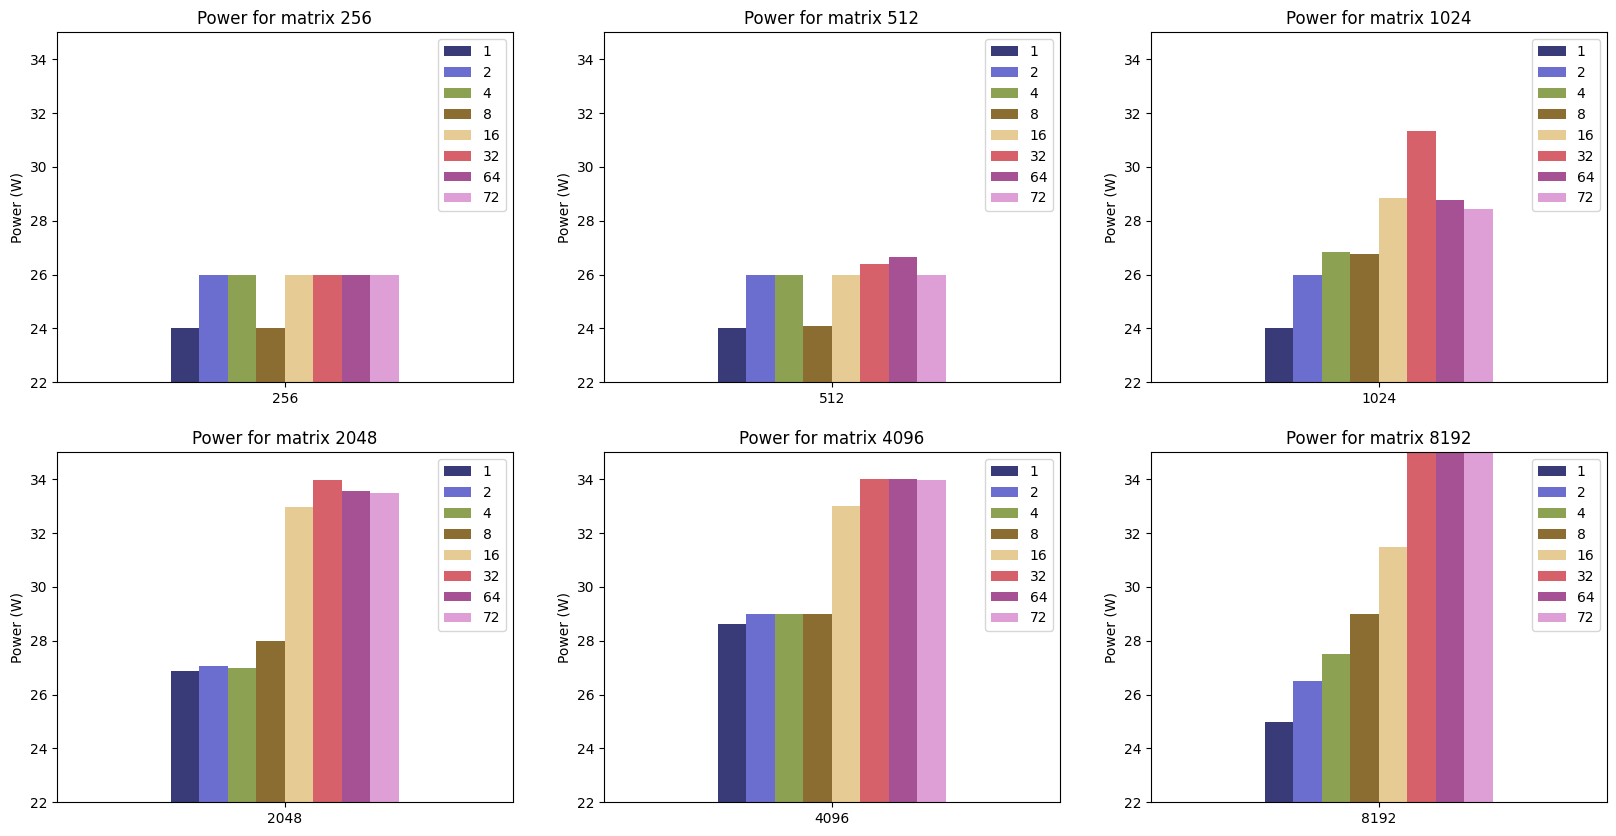

In [57]:
n_rows = int(np.ceil(len(unq_m) / 3))
fig, axs = plt.subplots(n_rows, 3, figsize=(20,10))
i, j = 0, 0
for m in unq_m:
    plot = df_power.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"Power for matrix {m}")
    plot.set_ylabel("Power (W)")
    plot.set_ylim(22,35)
    if j < 2:
        j += 1
    else:
        j = 0
        i += 1

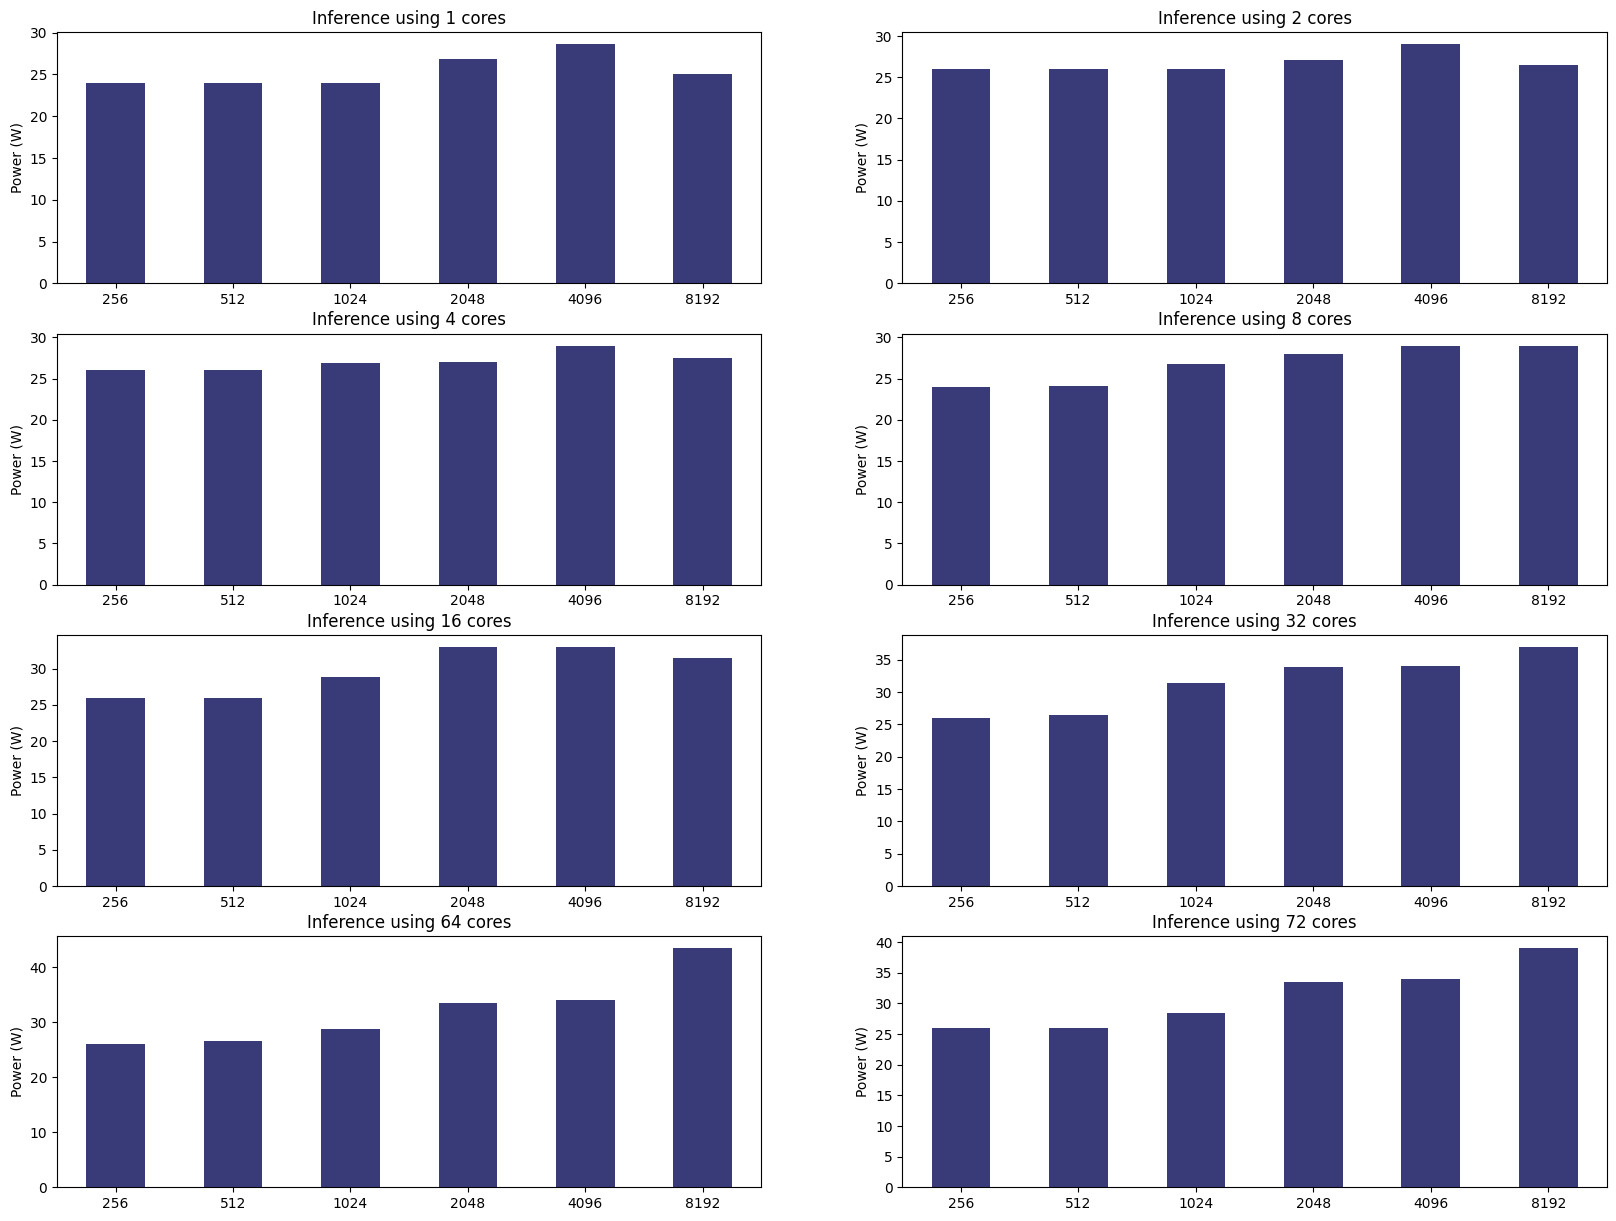

In [58]:
n_rows = int(np.ceil(len(df_power.columns) / 2))
if n_rows == 1:
    n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))
i, j = 0, 0
for g in df_power.columns:
    plot = df_power[g].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_ylabel("Power (W)")
    plot.set_title("Inference using " + str(g) + " cores")
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

## GFLOPS per Watt

In [59]:
df_gflops_w = df_inf_flops / df_power 
df_gflops_w

,1,2,4,8,16,32,64,72
256,4.887188,4.280891,4.545287,4.958638,4.406874,4.330192,4.540425,4.472948
512,17.753965,23.133141,20.170951,34.127134,32.615912,34.018076,34.622069,35.131624
1024,28.874025,48.103747,76.261748,116.353194,137.403443,146.106278,170.400594,175.080035
2048,28.559486,55.910492,105.866935,184.948550,253.839555,386.044020,517.474092,566.001059
4096,27.940021,54.669871,106.904913,206.254596,330.619883,567.480172,918.329319,1094.302659
8192,16.623517,31.311230,60.320217,113.436070,205.663428,335.343200,540.714399,762.058360


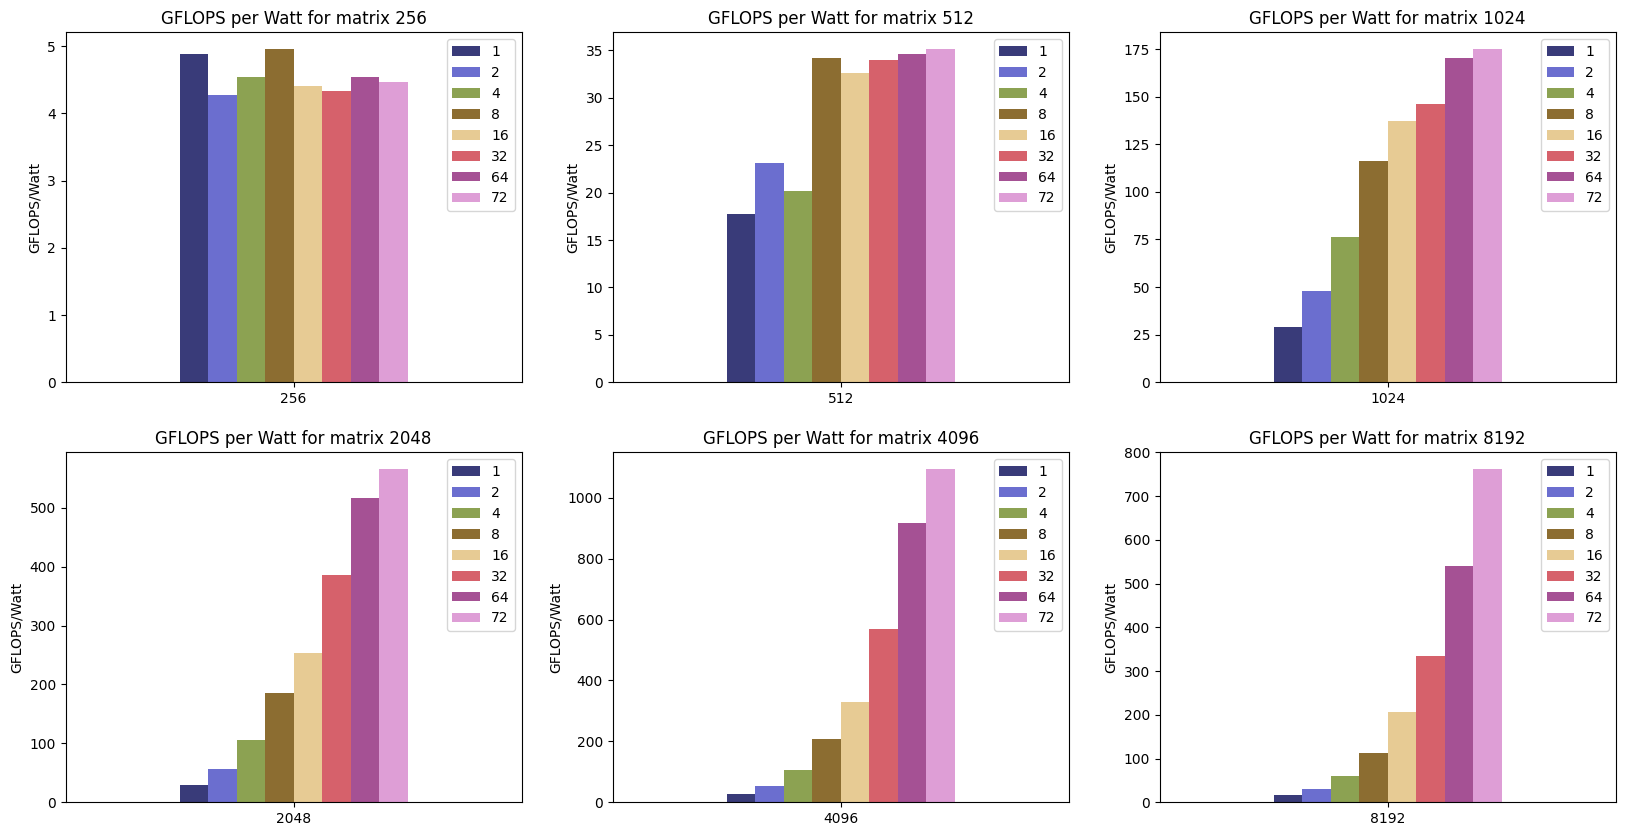

In [60]:
n_cols = 3
n_rows = int(np.ceil(len(unq_m) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,10))
i, j = 0, 0
for m in unq_m:
    plot = df_gflops_w.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"GFLOPS per Watt for matrix {m}")
    plot.set_ylabel("GFLOPS/Watt")
    if j < n_cols-1:
        j += 1
    else:
        j = 0
        i += 1

## CPU

In [61]:
df_torch = pd.read_csv("./results/torch_fp32_cores.csv")

In [62]:
key = "inference_avg"
df_cpu = pd.DataFrame()
for cores in df_torch['cores'].unique():
    if cores in core_selected:
        val = df_torch.loc[(df_torch['cores'] == cores)][key].values
        df_cpu[cores] = val

df_cpu.index = df_torch['m'].unique()    
df_cpu  = df_cpu.reindex(sorted(df_cpu.columns), axis=1)
df_cpu

,1,2,4,8
256,5.352998e+02,1.450086e+02,8.233786e+01,6.610394e+01
512,1.990552e+03,1.135507e+03,5.682182e+02,3.813505e+02
1024,1.583582e+04,8.421755e+03,4.657400e+03,2.996328e+03
2048,1.262439e+05,6.576476e+04,3.749626e+04,2.408476e+04
3072,4.518088e+05,2.266559e+05,1.341165e+05,9.563474e+04
4096,9.980247e+05,5.261798e+05,3.086495e+05,2.110818e+05
5120,1.938647e+06,1.019787e+06,5.904347e+05,3.980401e+05
6144,0.000000e+00,1.775028e+06,1.025788e+06,7.262724e+05
7128,0.000000e+00,2.751581e+06,1.558969e+06,1.033310e+06


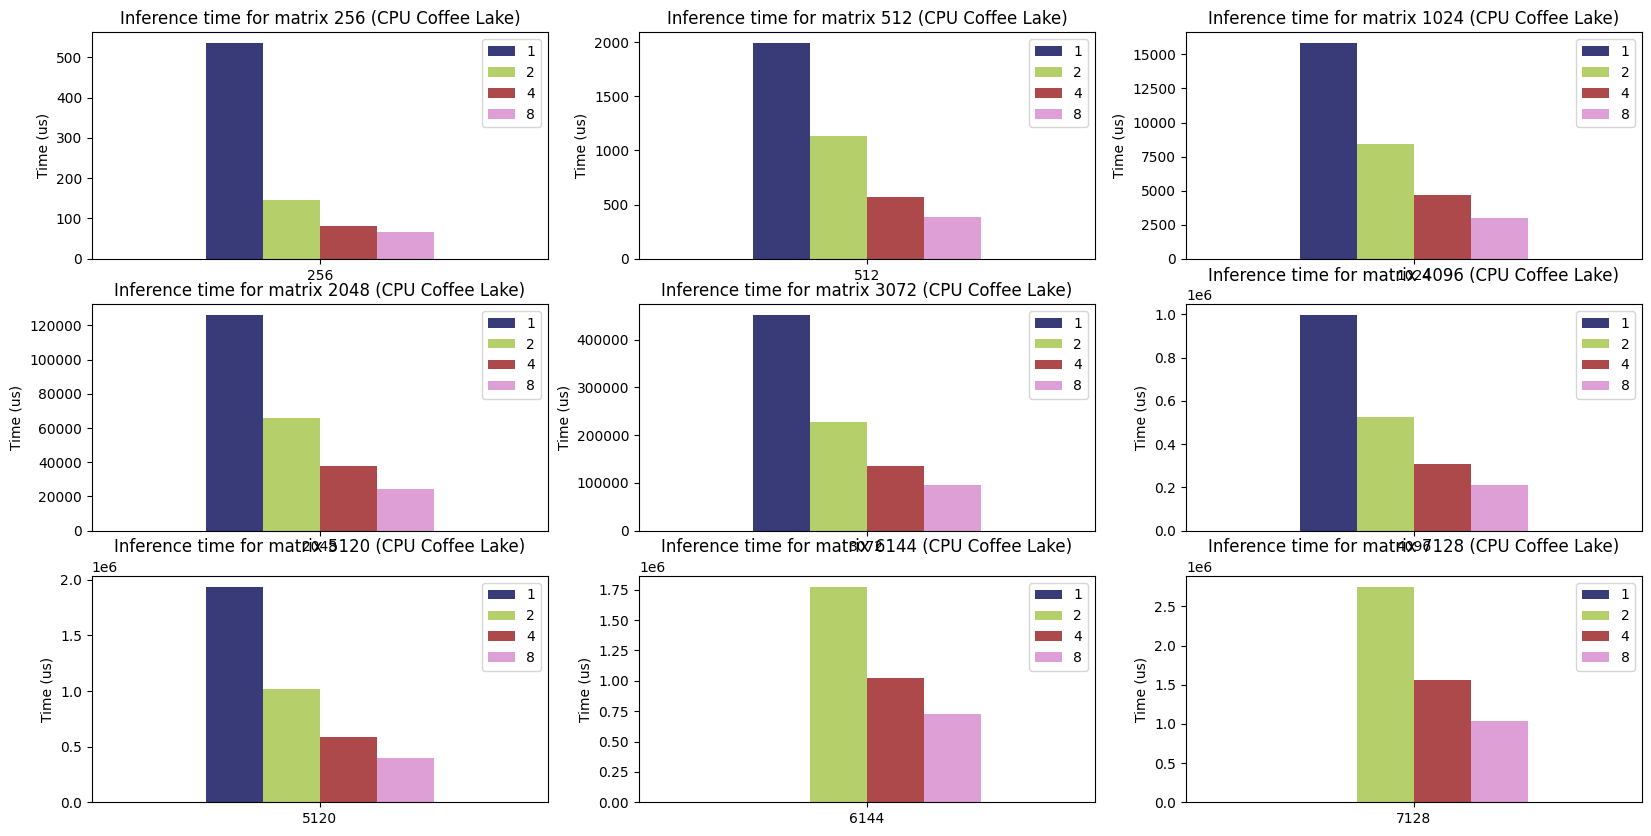

In [63]:
unq_m = df_torch['m'].unique() 
n_rows = int(np.ceil(len(unq_m) / 3))
fig, axs = plt.subplots(n_rows, 3, figsize=(20,10))
i, j = 0, 0
for m in unq_m:
    plot = df_cpu.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"Inference time for matrix {m} (CPU Coffee Lake)")
    plot.set_ylabel("Time (us)")
    # plot.set_ylim(22,35)
    if j < 2:
        j += 1
    else:
        j = 0
        i += 1

In [64]:
n_flop = 2 * np.power(df_cpu.index, 3)
df_cpu_flops = pd.DataFrame()
for conf in df_cpu.columns:
    df_cpu_flops[conf] = n_flop/ 1e9 / (df_cpu[conf] / 1e6)
df_cpu_flops

,1,2,4,8
256,62.683441,231.396209,407.521321,507.601127
512,134.854785,236.401487,472.416127,703.907413
1024,135.609214,254.992420,461.090696,716.705159
2048,136.084740,261.232139,458.175550,713.308610
3072,128.333169,255.815323,432.326127,606.286589
4096,137.710976,261.201504,445.291316,651.117074
5120,138.465334,263.226897,454.640378,674.393027
6144,inf,261.323534,452.195347,638.681101
7128,inf,263.239362,464.617622,700.975111


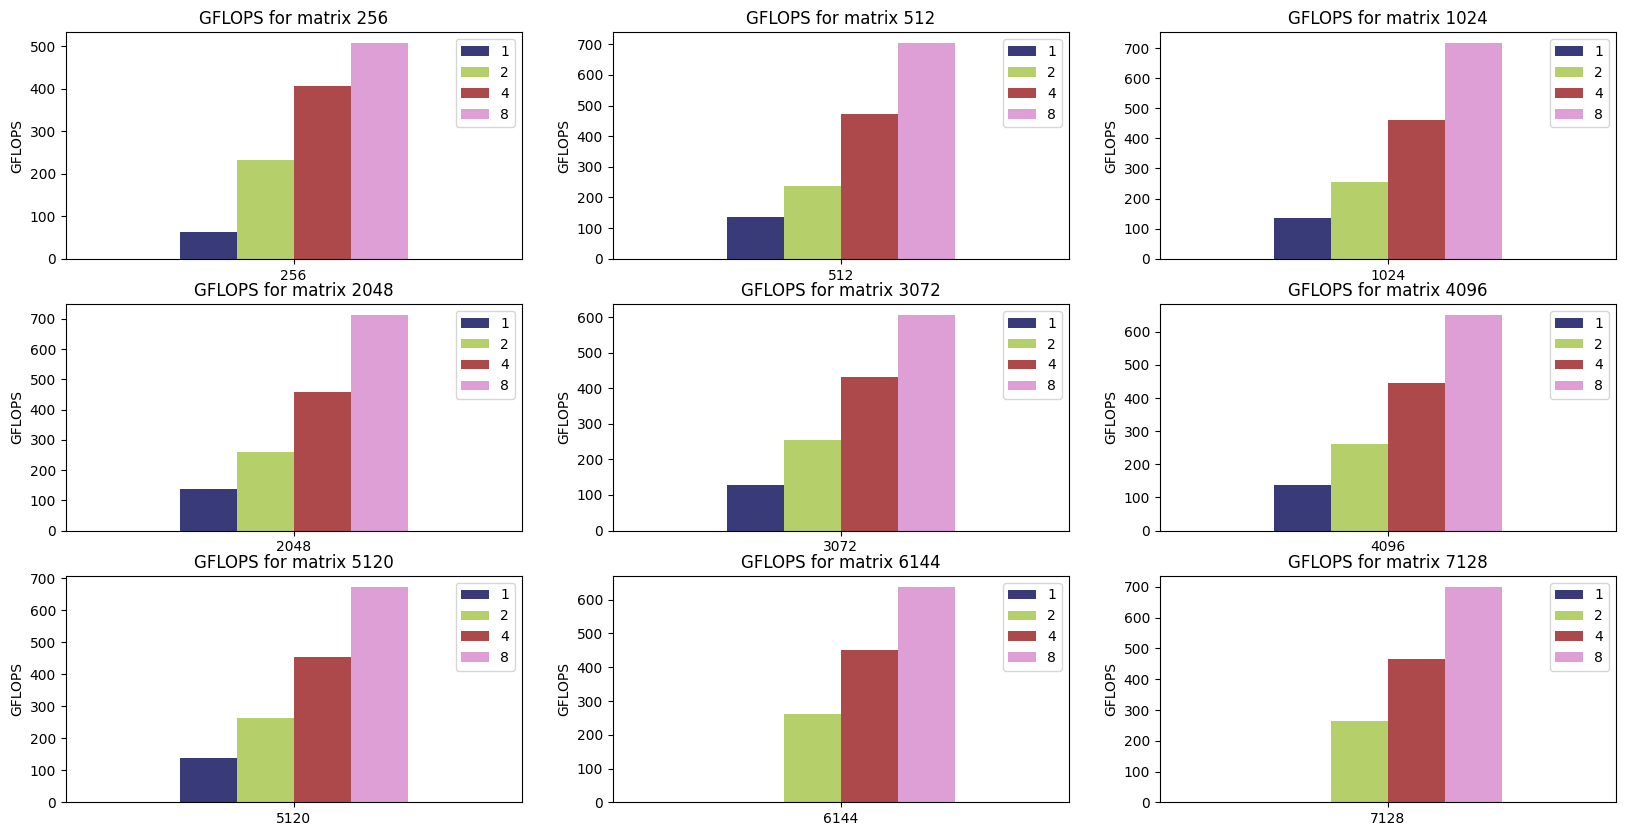

In [65]:
unq_m = df_torch['m'].unique() 
n_cols = 3
n_rows = int(np.ceil(len(unq_m) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,10))
i, j = 0, 0
for m in unq_m:
    plot = df_cpu_flops.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"GFLOPS for matrix {m}")
    plot.set_ylabel("GFLOPS")
    # plot.set_ylim(22,35)
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

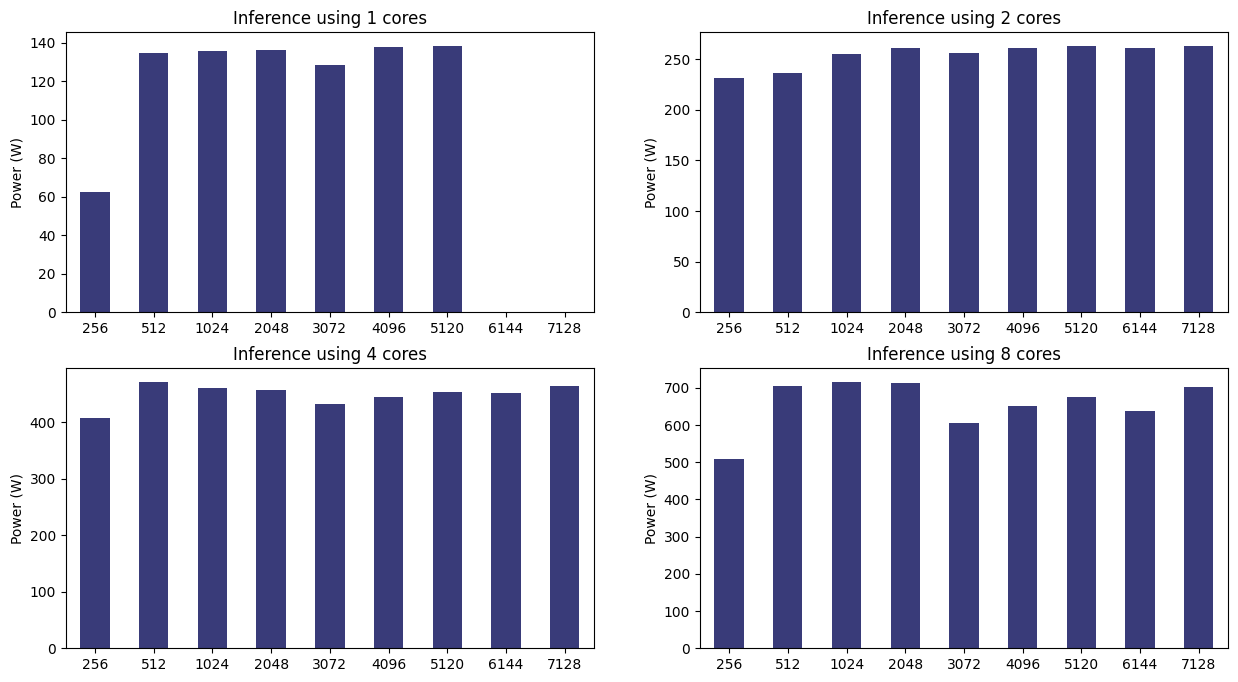

In [66]:
n_rows = int(np.ceil(len(df_cpu_flops.columns) / 2))
if n_rows == 1:
    n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,8))
i, j = 0, 0
for g in df_cpu_flops.columns:
    plot = df_cpu_flops[g].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_ylabel("Power (W)")
    plot.set_title("Inference using " + str(g) + " cores")
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

## Roofline?

In [67]:
peak_gflops = 55000
peak_gbs = 102.4 

In [68]:
peak_gflops/peak_gbs

537.109375

In [69]:
mm_flops = 2 * np.power(df_inf_flops.index, 3)
mm_mop = 3 * np.power(df_inf_flops.index, 2)
th_ai = mm_flops / mm_mop
th_ai

Index([170.66666666666666,  341.3333333333333,  682.6666666666666,
       1365.3333333333333, 2730.6666666666665,  5461.333333333333],
      dtype='float64')

In [70]:
df_ai = pd.DataFrame()
for g in df_inf_flops.columns:
    df_ai[g] = df_inf_flops[g] * 1e9 / mm_mop
df_ai

,1,2,4,8,16,32,64,72
256,596580.552285,566117.233097,601081.620930,6.053025e+05,5.827776e+05,5.726369e+05,6.004387e+05,5.915154e+05
512,541808.015403,764798.064919,666865.943998,1.045094e+06,1.078305e+06,1.142397e+06,1.173099e+06,1.161476e+06
1024,220291.330995,397586.003086,650842.579768,9.899137e+05,1.259713e+06,1.455925e+06,1.558258e+06,1.583611e+06
2048,60994.512236,120281.936617,227165.797716,4.114569e+05,6.647121e+05,1.041791e+06,1.380297e+06,1.505538e+06
4096,15885.636715,31499.589464,61596.283942,1.187984e+05,2.167713e+05,3.833438e+05,6.203492e+05,7.387153e+05
8192,2064.247525,4121.400883,8239.378305,1.633985e+04,3.217855e+04,6.162970e+04,1.168304e+05,1.476222e+05


In [71]:
def frange(start, stop, step=100.0):
    f = start
    while f < stop:
        f += step
        yield f
        
xticks = [2.**i for i in range(-1, 11)]
x = list(frange(min(xticks), max(xticks), 0.01))

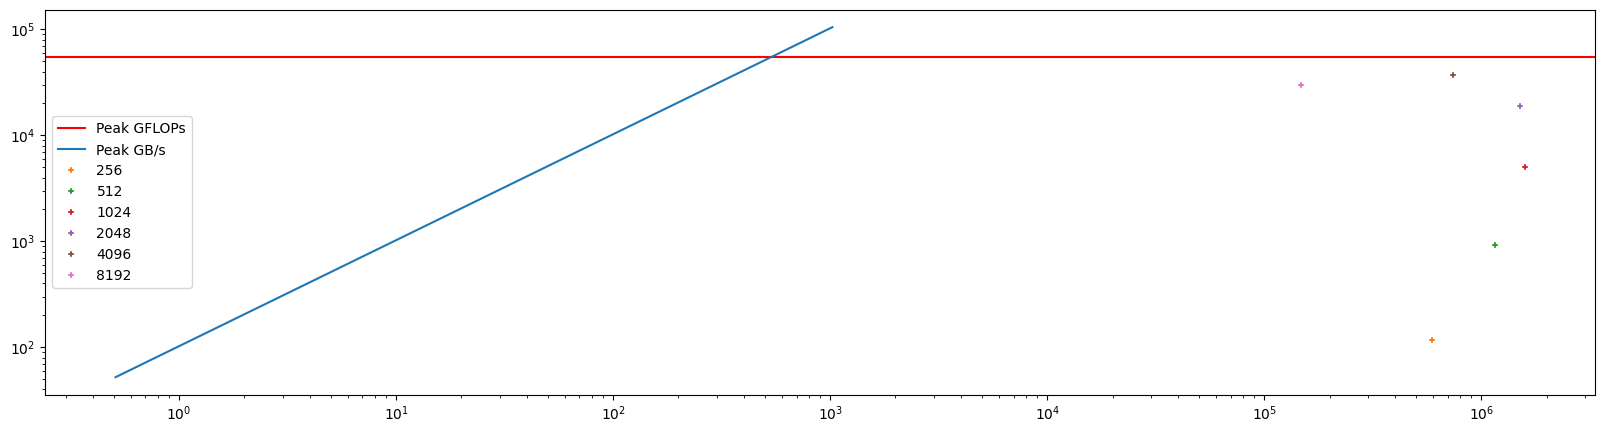

In [72]:
fix, ax = plt.subplots(figsize=(20,5))

# ax.plot(x, [peak_gflops for x in x])
ax.axhline(peak_gflops, color="r", label="Peak GFLOPs")
ax.plot(x, [peak_gbs * x for x in x], label="Peak GB/s")

# mat_dim = 256
# for lb, ai, perf in zip(df_ai.columns, df_ai.loc[mat_dim].values, df_inf_flops.loc[mat_dim].values):

core = 72
for lb, ai, perf in zip(df_ai.index, df_ai[core].values, df_inf_flops[core].values):
# 
# for ai in th_ai:
    # perf = min(peak_gflops, ai * peak_gbs)
    # perf = ai * peak_gbs

    ax.plot(ai, perf, '+', markersize=2, markeredgewidth=4, label=lb)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()